# Google Data Analytics Case study.
## Cyclistic bike-share analysis case study.

### Introduction 
A case study on the examination of cyclic bike sharing! You and a few other important team members are employed by the imaginary company Cyclistic in this case study. Use the steps of the data analysis process—Ask, Prepare, Process, Analyze, Share, and Act—to find the answers to the business questions. The Case Study Roadmap tables, which include important activities and guiding questions, can assist you in staying on course as you proceed.

* Scenario
At Chicago's Cyclistic, a bike-sharing firm, you are a junior data analyst on the marketing analyst team. The marketing director thinks that increasing the number of yearly subscriptions is essential to the company's future success. As a result, your team is interested in seeing how annual members and casual riders use Cyclistic bikes differently. Your team will create a new marketing plan based on these findings to turn casual riders into yearly members. However, your proposals must first be approved by Cyclistic executives, so they must be supported by expert data visualizations and convincing data insights.
Teams and characters

* Cyclistic: A bike-sharing scheme with 600 docking stations and over 5,800 bicycles. In order to make bike-sharing more accessible to individuals with disabilities and others who are unable to operate a typical two-wheeled bike, Cyclistic distinguishes itself by providing cargo bikes, hand tricycles, and reclining bikes. About 8% of riders use the assistance choices, whereas most riders use standard bikes. Although cyclists are more likely to ride for fun, over 30% of them also use their bikes to get to work every day.

* Lily Moreno: Your manager and the director of marketing. Moreno is in charge of creating campaigns and projects to advertise the bike-share service.
These could include social media, email, and other platforms.

## About the company 

* In 2016, Cyclistic launched a successful bike-share oering. Since then, the program has grown
to a eet of 5,824 bicycles that are geotracked and locked into a network of 692 stations
across Chicago. The bikes can be unlocked from one station and returned to any other station
in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to
broad consumer segments. One approach that helped make these things possible was the
exibility of its pricing plans: single-ride passes, full-day passes, and annual memberships.
Customers who purchase single-ride or full-day passes are referred to as casual riders.
Customers who purchase annual memberships are Cyclistic members.
Cyclistic’s nance analysts have concluded that annual members are much more protable
than casual riders. Although the pricing exibility helps Cyclistic aract more customers,
Moreno believes that maximizing the number of annual members will be key to future growth.
Rather than creating a marketing campaign that targets all-new customers, Moreno believes
there is a solid opportunity to convert casual riders into members. She notes that casual riders
are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.
Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into
annual members. In order to do that, however, the team needs to beer understand how
annual members and casual riders dier, why casual riders would buy a membership, and how
digital media could aect their marketing tactics. Moreno and her team are interested in
analyzing the Cyclistic historical bike trip data to identify trends.

# Ask 
## Three questions will guide the future marketing program: 
1. How do annual members and casual riders use Cyclistic bikes diferently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to inuence casual riders to become members?


Lily Moreno, the key stakeholder, wants us to understand how members and casual riders use the leased bikes as well as any factors that might persuade casual riders to become members. This information will help the marketing team improve their propaganda and effectively engage casual riders on social media with marketing and promotions.
   
This analysis will make use of the Cyclistic bike-share dataset, which documents the travels of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The October 2023–October 2024 timeframe is covered by the dataset.

# Prepare 

* There are twelve CSV files in total, one for each month, and the data is arranged as.CSV.
* The data contains information about bike rides that can help generate insights to address the problems of the business.
* The data is ready for analysis, consistent in one format.


# Process 

Python is the tool I've chosen to lead this study because of its ability to handle big datasets and how simple it is to clean and arrange data using the packages that are available.


# DATA LIBRARY IMPORTATION 
* The code that follows will import GLOB to bring in all of the CSV files from the folder, PANDAS to clean the data, DATETIME to handle the time and data columns, NUMPY to do calculations, and MATPLOTLIB.PYPLOT/SEABORN to plot the results.

In [1]:
import glob
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
print("Setup Complete")

Setup Complete


# CSV IMPORTATION 
Concatenating all of the data into a dataframe "dfm" requires the following code to pull all of the.csv files from the "tripsmonth" folder.

In [2]:
path = r'/kaggle/input/bikeshare'
filenames = glob.glob(path + "/*.csv")
df = []
for filename in filenames:
    df.append(pd.read_csv(filename))
dfm = pd.concat(df, ignore_index=True)

## Summarizing the data. 

In [3]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5854544 entries, 0 to 5854543
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 580.7+ MB


* After executing the aforementioned command, all columns with all of their data types are shown; nevertheless, some require correction.

In [4]:
dfm.info

<bound method DataFrame.info of                   ride_id  rideable_type           started_at  \
0        C1D650626C8C899A  electric_bike  2024-01-12 15:30:27   
1        EECD38BDB25BFCB0  electric_bike  2024-01-08 15:45:46   
2        F4A9CE78061F17F7  electric_bike  2024-01-27 12:27:19   
3        0A0D9E15EE50B171   classic_bike  2024-01-29 16:26:17   
4        33FFC9805E3EFF9A   classic_bike  2024-01-31 05:43:23   
...                   ...            ...                  ...   
5854539  CB82F1F5D0505469   classic_bike  2023-10-30 07:35:46   
5854540  E2C362589E4AD3A9   classic_bike  2023-10-10 06:29:55   
5854541  965D4156EDECF21A   classic_bike  2023-10-26 06:26:23   
5854542  0919ED32225E4D31   classic_bike  2023-10-09 08:47:29   
5854543  34C4F779743D5F49  electric_bike  2023-10-13 17:30:30   

                    ended_at            start_station_name start_station_id  \
0        2024-01-12 15:37:59             Wells St & Elm St     KA1504000135   
1        2024-01-08 15:52:59 

* After using the.info function, it is simpler to comprehend how the dataframe appears.
There are a lot of rows in the dataframe—five million eight hundred fifty-four thousand five hundred forty-three rows.
In order to answer the questions at the beginning of the paper, there is information about the members' types, bike types, stations, the time the journey began and ended, and a lot more.

The dataframe's columns with missing data are shown with the following command.

In [5]:
dfm.isnull().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1056535
start_station_id      1056535
end_station_name      1091792
end_station_id        1091792
start_lat                   0
start_lng                   0
end_lat                  7441
end_lng                  7441
member_casual               0
dtype: int64

* MISSING ROWS VALUES uses .dropna function below to remove the missing values from the specified columns.





In [6]:
dfm.dropna(subset=["end_lng","end_lat","end_station_id","end_station_name","start_station_id","start_station_name"], axis=0, inplace = True)

* We saw that several of the columns had incorrect data types when the.info function was executed above. To fix this, we will use the following codes:

In [7]:
dfm['started_at'] = pd.to_datetime(dfm['started_at'], format="mixed")

In [8]:
dfm['ended_at'] = pd.to_datetime(dfm['ended_at'], format="mixed")

* Identifying duplicate rides

In [9]:
dfm['ride_id'].duplicated().sum()

121

* After using the aforementioned command to identify and add up all of the duplicate rides, 121 were discovered. The duplicate ride_id rows will be eliminated using the following coommand.

In [10]:
dfm = dfm.drop_duplicates(subset=['ride_id'], keep='first')

In [11]:
dfm.info

<bound method DataFrame.info of                   ride_id  rideable_type          started_at  \
0        C1D650626C8C899A  electric_bike 2024-01-12 15:30:27   
1        EECD38BDB25BFCB0  electric_bike 2024-01-08 15:45:46   
2        F4A9CE78061F17F7  electric_bike 2024-01-27 12:27:19   
3        0A0D9E15EE50B171   classic_bike 2024-01-29 16:26:17   
4        33FFC9805E3EFF9A   classic_bike 2024-01-31 05:43:23   
...                   ...            ...                 ...   
5854539  CB82F1F5D0505469   classic_bike 2023-10-30 07:35:46   
5854540  E2C362589E4AD3A9   classic_bike 2023-10-10 06:29:55   
5854541  965D4156EDECF21A   classic_bike 2023-10-26 06:26:23   
5854542  0919ED32225E4D31   classic_bike 2023-10-09 08:47:29   
5854543  34C4F779743D5F49  electric_bike 2023-10-13 17:30:30   

                   ended_at            start_station_name start_station_id  \
0       2024-01-12 15:37:59             Wells St & Elm St     KA1504000135   
1       2024-01-08 15:52:59             Wel

* The dataframe is now clean and prepared for the Analyze phase, which comes next. We currently have a dataframe with 13 columns and 4228096 rows that is free of duplicated rides and missing values.

# Analyze 

* To get the trip duration in minutes, subtract ended_at time from start_at time (datetime) and divide the result by (60). This creates a new column on the dataframe with the trip duration in minutes.

In [12]:
dfm['trip_duration'] = (dfm['ended_at'] - dfm['started_at']).dt.total_seconds() / 60

/tmp/ipykernel_17/800814453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['trip_duration'] = (dfm['ended_at'] - dfm['started_at']).dt.total_seconds() / 60


* Below we can see the highests trip duration, they are fairly high getting to up to a day.

In [13]:
dfm['trip_duration'].nlargest(1000)

4623958    1509.366667
1679399    1498.434900
4887567    1497.650000
1045187    1497.543300
4127123    1497.500000
              ...     
286944     1161.674150
182437     1160.740117
1804206    1160.691567
1189152    1160.409333
3262653    1160.374550
Name: trip_duration, Length: 1000, dtype: float64

* The week day name is created in a new column on the dataframe using the function ".dt.day_name" above.

In [14]:
dfm["Week_day"] = dfm["started_at"].dt.day_name()

/tmp/ipykernel_17/1589888715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Week_day"] = dfm["started_at"].dt.day_name()


Adding a new column for the month and formatting it in the YYYY/mm format.

In [15]:
dfm['month'] = pd.to_datetime(dfm['started_at'])

/tmp/ipykernel_17/3837543697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['month'] = pd.to_datetime(dfm['started_at'])


In [16]:
dfm['month'] = dfm['month'].dt.strftime('%Y/%m')

/tmp/ipykernel_17/2849958680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['month'] = dfm['month'].dt.strftime('%Y/%m')


* Using the dt.day function to obtain the day of the month.

In [17]:
dfm['day_of_month'] = dfm['started_at'].dt.day

/tmp/ipykernel_17/2841463646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['day_of_month'] = dfm['started_at'].dt.day


In [18]:
dfm.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,Week_day,month,day_of_month
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member,7.533333,Friday,2024/01,12
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member,7.216667,Monday,2024/01,8
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member,8.000000,Saturday,2024/01,27
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member,29.816667,Monday,2024/01,29
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member,26.200000,Wednesday,2024/01,31


* In order to create new dataframes, we will use group into smaller data and do calculations.
* A new data frame with the columns "start_station_name," "ride_id," and "member_casual" will be created below. It will be grouped by "start_station_name," "member_casual," and count the ride_id rows for each station name and member type.

### GROUPING 1 

In [19]:
img8 = dfm[['start_station_name','ride_id','member_casual']]
img8_grouped = img8.groupby(['start_station_name','member_casual'], as_index=False).agg({'ride_id': 'count'})
img8_grouped = img8_grouped.sort_values(by='ride_id', ascending=False)
img8_h10 = img8_grouped.head(20)
img8_h10

,start_station_name,member_casual,ride_id
2898,Streeter Dr & Grand Ave,casual,46435
567,DuSable Lake Shore Dr & Monroe St,casual,31027
979,Kingsbury St & Kinzie St,member,26230
414,Clinton St & Washington Blvd,member,25566
1298,Michigan Ave & Oak St,casual,22869
360,Clark St & Elm St,member,22372
406,Clinton St & Madison St,member,22368
569,DuSable Lake Shore Dr & North Blvd,casual,20989
1312,Millennium Park,casual,20094
2730,Shedd Aquarium,casual,19564


* Currently, 20 rows of the data frame are displayed, grouped by type and station name and ordered by ride_id (count) in descending order (greater value first). It is evident that the top two stations have a significant number of casual riders.


## Grouping 2 

* Creating a new dataframe with the following columns 'start_station_name','trip_duration','member_casual', grouping by 'start_station_name','member_casual'
getting average trip duration for eachg station name and member type then sorting it as descending order (Higher values first), setting limit to 20,
above is how the new dataframe will look like:                                                                                    

In [20]:
img9 = dfm[['start_station_name','trip_duration','member_casual']]
img9_grouped = img9.groupby(['start_station_name','member_casual'], as_index=False).agg({'trip_duration': 'mean'})
img9_grouped = img9_grouped.sort_values(by='trip_duration', ascending=False)
img9_h20 = img9_grouped.head(20)
img9_h20

,start_station_name,member_casual,trip_duration
691,Glenlake Ave & Pulaski Rd,casual,262.841667
2335,Public Rack - Peterson Ave & Milwaukee Ave,member,173.891733
1919,Public Rack - Kedzie & 73rd,casual,101.083333
455,Cottage Grove Ave & 78th St,casual,89.238201
817,Homewood Ave & 115th St,casual,89.088499
2950,Vincennes Ave & 104th St,casual,88.993522
1202,Major Taylor Trail & 115th St,casual,87.824405
454,Cottage Grove Ave & 71st St,member,80.498461
2597,Pulaski Rd & Congress Pkwy,casual,80.338172
2662,Rockwell St & 63rd St,member,80.314260


# GROUPING 3 

* A new dataframe with the columns "ride_id" and "member_casual" will be generated below. It will be grouped by member casuals and count the unique "ride_id" values.

In [21]:
img1 = dfm[['ride_id','member_casual']]
img1_GU = img1.groupby('member_casual')['ride_id'].count()
img1_GU

member_casual
casual    1504234
member    2723861
Name: ride_id, dtype: int64

# GROUPING 4. 

The columns "member_casual" and "trip_duration" will be added to a new dataframe, which will be grouped by "member_casual" and used to compute the average "trip_duration."

In [22]:
img2 = dfm[['member_casual','trip_duration']]
img2_grouped = img2.groupby(['member_casual'], as_index=False).agg({'trip_duration': 'mean'})
img2_grouped

,member_casual,trip_duration
0,casual,23.956089
1,member,12.436493


## GROUPING 5. 

* A new dataframe will be created below, containing the columns "rideable_type," "ride_id," and "member_casual." It will be grouped by "rideable_type," "member_casual," and the total "ride_id" count for each type of bike and member type.

In [23]:
img3 = dfm[['rideable_type','ride_id','member_casual']]
img3_grouped = img3.groupby(['rideable_type','member_casual'], as_index=False).agg({'ride_id': 'count'})
img3_grouped

,rideable_type,member_casual,ride_id
0,classic_bike,casual,964558
1,classic_bike,member,1812916
2,electric_bike,casual,513936
3,electric_bike,member,888858
4,electric_scooter,casual,25740
5,electric_scooter,member,22087


# GROUPING 6. 

* Using the original DFM dataframe, create a new dataframe with the columns "Week_day," "trip_duration," and "member_casual." Group the data by member type and week day name, then compute the average trip duration.
The names of the weekdays have to be arranged correctly.

In [24]:
img4 = dfm[['Week_day','trip_duration','member_casual']]
img4_grouped = img4.groupby(['Week_day', 'member_casual'], as_index=False).agg({'trip_duration': 'mean'})
week_day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
img4_grouped['Week_day'] = pd.Categorical(img4_grouped['Week_day'], categories=week_day_order, ordered=True)
img4_grouped = img4_grouped.sort_values('Week_day')
img4_grouped

,Week_day,member_casual,trip_duration
2,Monday,casual,23.153754
3,Monday,member,11.870757
10,Tuesday,casual,20.751015
11,Tuesday,member,11.926484
12,Wednesday,casual,21.498016
13,Wednesday,member,12.149211
8,Thursday,casual,20.796465
9,Thursday,member,11.868467
0,Friday,casual,23.024817
1,Friday,member,12.035260


## GROUPING 7. 

* Making a new data frame that is quite similar to the one made earlier, but we will count the number of rides rather than the trip duration.

In [25]:
img5 = dfm[['Week_day','ride_id','member_casual']]
img5_grouped = img5.groupby(['Week_day', 'member_casual'], as_index=False).agg({'ride_id': 'count'})
img5_grouped
img5_grouped['Week_day'] = pd.Categorical(img5_grouped['Week_day'], categories=week_day_order, ordered=True)
img5_grouped = img5_grouped.sort_values('Week_day')
img5_grouped

,Week_day,member_casual,ride_id
2,Monday,casual,181857
3,Monday,member,407054
10,Tuesday,casual,164419
11,Tuesday,member,425820
12,Wednesday,casual,188450
13,Wednesday,member,452733
8,Thursday,casual,184781
9,Thursday,member,428540
0,Friday,casual,214680
1,Friday,member,375614


### GROUPING 8 

* A new dataframe will be formed below, combining the columns "day_of_month" and "member_casual" and calculating the total number of rides_id for each month's day and member type.

In [26]:
img6_grouped = dfm.groupby(['day_of_month','member_casual']).agg({'ride_id': 'count'}).reset_index()
img6_grouped

,day_of_month,member_casual,ride_id
0,1,casual,47343
1,1,member,79220
2,2,casual,53184
3,2,member,91609
4,3,casual,53334
...,...,...,...
57,29,member,84591
58,30,casual,47074
59,30,member,89792
60,31,casual,31675


# SHARE 

## In order to help others quickly visualize  and comprehend the data for insights and data-driven decisions, we will present our findings in the form of visuals during this phase. 

**Important Note: Members will always be represented by the color yellow, and casual will be represented by the color purple, therefore please keep this in mind while interpreting the charts below.**

* The trends that will be discussed on the aforementioned photos were identified using the data that was provided.

## PLOT 1 

* The 20 stations with the most rides, broken down by member type, will be shown in the bar plot below.

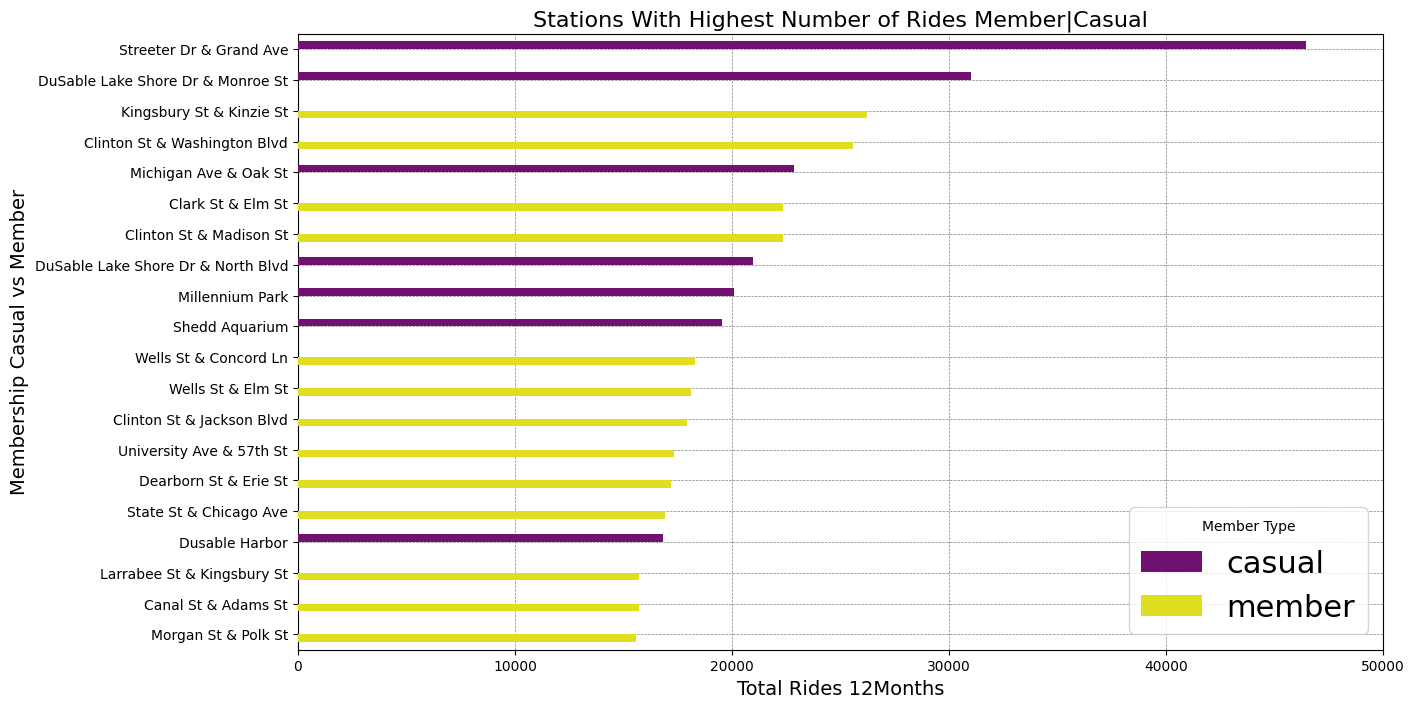

In [27]:
plt.figure(figsize=(14, 8))
sns.barplot(data=img8_h10, x="ride_id", y="start_station_name", hue="member_casual", palette=["#800080", "#FFFF00"], width=0.5, zorder=3)
plt.grid(True, which='both', axis='x',linestyle='dashed', linewidth=0.5, color='gray', zorder=3)
plt.grid(True, which='both', axis='y',linestyle='dashed', linewidth=0.5, color='gray', zorder=3)
plt.xticks(ticks=plt.gca().get_xticks(), labels=[f"{x:.0f}" for x in plt.gca().get_xticks()])
plt.title("Stations With Highest Number of Rides Member|Casual", fontsize=16)
plt.xlabel("Total Rides 12Months", fontsize=14)
plt.ylabel("Membership Casual vs Member", fontsize=14)
plt.legend(title='Member Type', loc='lower right', fontsize=22)
plt.show()

* We can see from the plot above that a significant percentage of casual members begin rides from the DuSable Lake Shore Dr & Monroe ST and Street Dr & Grand Ave stations.

## PLOT 2 

* To verify the average trip duration by start station a bar plot will be used:

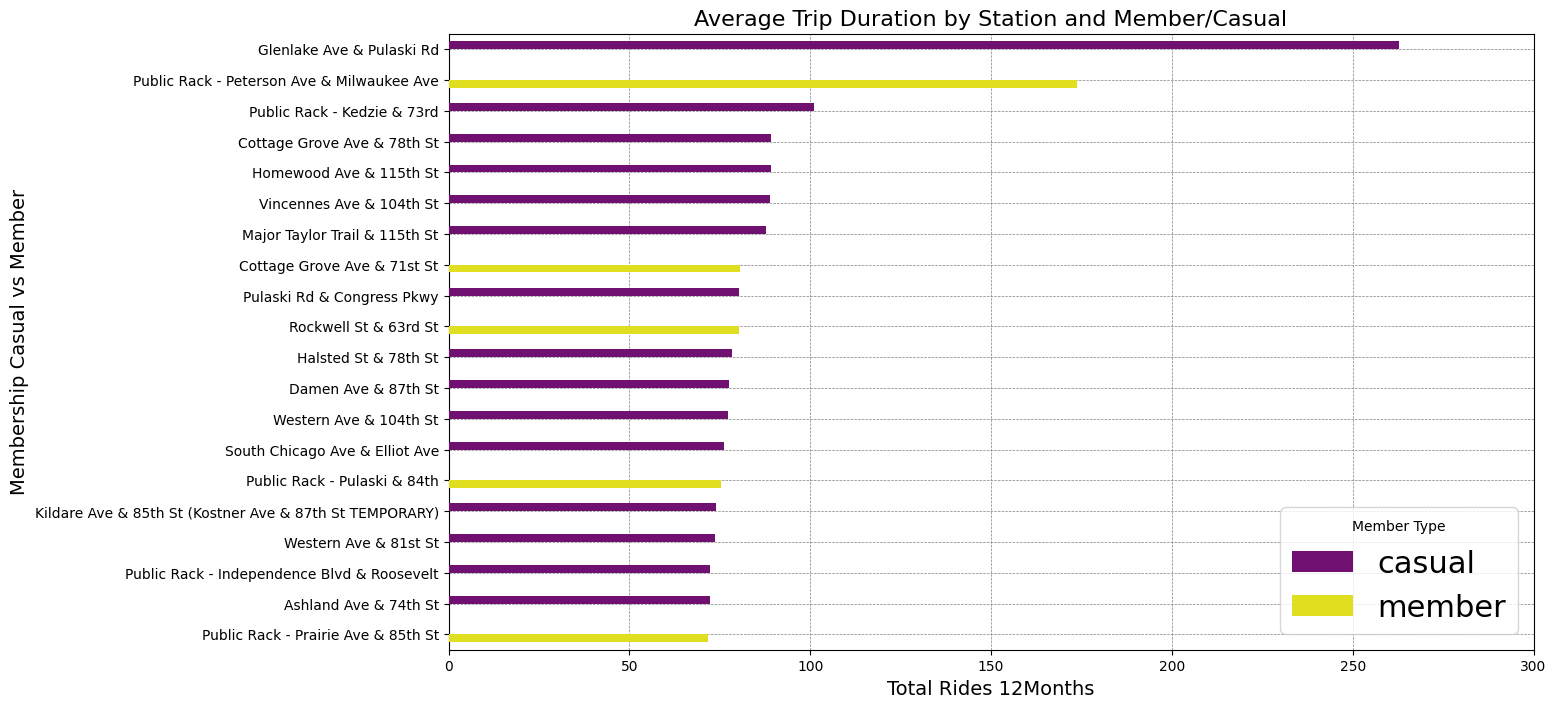

In [28]:
plt.figure(figsize=(14, 8))
sns.barplot(data=img9_h20, x="trip_duration", y="start_station_name", hue="member_casual", palette=["#800080", "#FFFF00"], width=0.5, zorder=3)
plt.grid(True, which='both', axis='x',linestyle='dashed', linewidth=0.5, color='gray', zorder=3)
plt.grid(True, which='both', axis='y',linestyle='dashed', linewidth=0.5, color='gray', zorder=3)
plt.xticks(ticks=plt.gca().get_xticks(), labels=[f"{x:.0f}" for x in plt.gca().get_xticks()])
plt.title("Average Trip Duration by Station and Member/Casual", fontsize=16)
plt.xlabel("Total Rides 12Months", fontsize=14)
plt.ylabel("Membership Casual vs Member", fontsize=14)
plt.legend(title='Member Type', loc='lower right', fontsize=22)
plt.show()

* By looking at the plot of the 20 stations with the longest average trip duration above, we can observe that 15 out of 20 stations have lengthier riders who are casuals.

## PLOT 3 

* To show the distribution of total rides by member type, a pie chart was chosen.

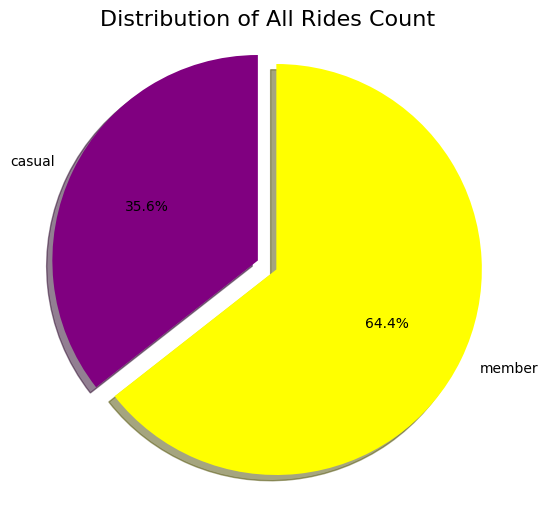

In [29]:
plt.figure(figsize=(6, 6))
explode = (0.1, 0) 
colors = ["#800080", "#FFFF00"]
plt.pie(img1_GU, labels=img1_GU.index, autopct='%1.1f%%', colors=colors, 
        startangle=90, explode=explode, shadow=True)
plt.axis('equal')
plt.title("Distribution of All Rides Count", fontsize=16)
plt.show()

* As can be seen from the plot above, members are in charge of a significant portion of all rides—64.4% of all rides.

# PLOT 4 

* The average trip duration for members and casuals will be shown below using a bar plot.

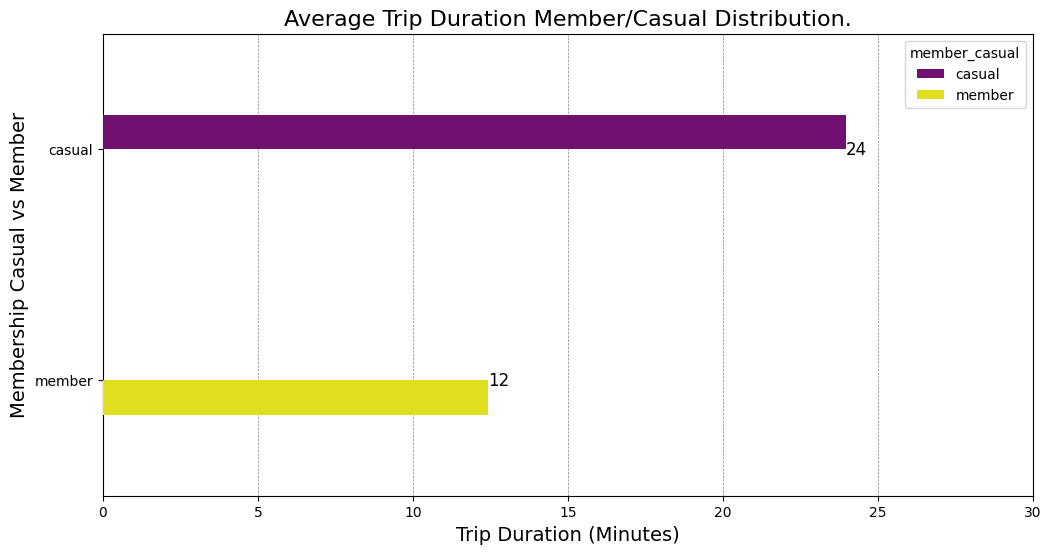

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(data=img2_grouped, x="trip_duration", y="member_casual", hue="member_casual", 
            palette=["#800080", "#FFFF00"], width=0.3, zorder=3)
for index, row in img2_grouped.iterrows():
    plt.text(row['trip_duration'] + 0, index, f"{row['trip_duration']:.0f}", 
             color="black", ha="left", va="center", fontsize=12)
plt.grid(True, which='both', axis='x', linestyle='dashed', linewidth=0.5, color='gray', zorder=3)
plt.xticks(ticks=plt.gca().get_xticks(), labels=[f"{x:.0f}" for x in plt.gca().get_xticks()])
plt.title("Average Trip Duration Member/Casual Distribution.", fontsize=16)
plt.xlabel("Trip Duration (Minutes)", fontsize=14)
plt.ylabel("Membership Casual vs Member", fontsize=14)
plt.show()

* It is evident from examining the plot above that members take an average of 12 minutes per trip, but casuals take an average of 24 minutes.

### PLOT 5 

* The number of trips by bike type and user type is shown in a bar plot below.

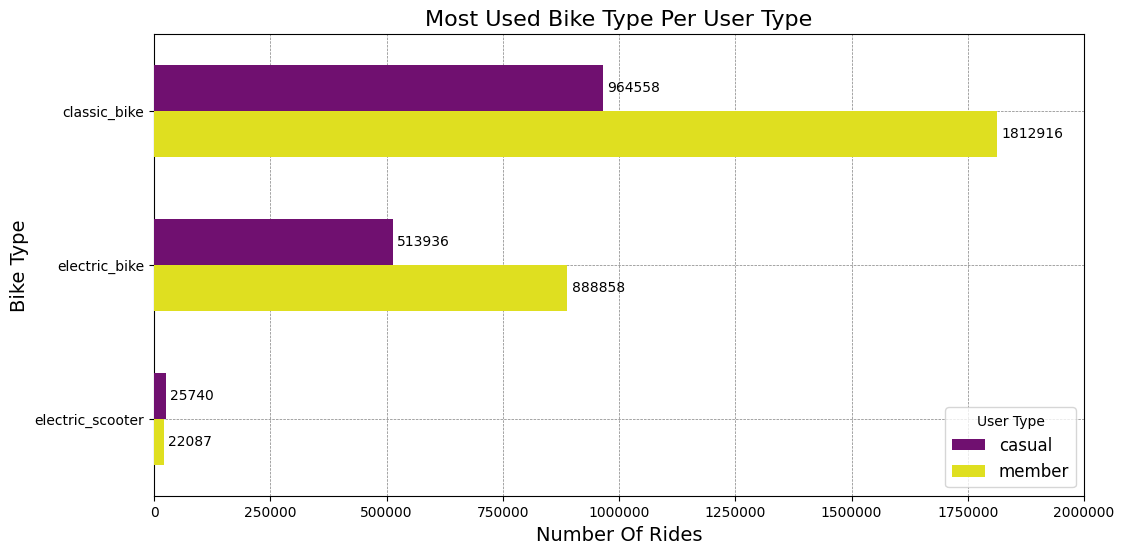

In [31]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=img3_grouped, 
    x="ride_id", 
    y="rideable_type", 
    hue="member_casual", 
    palette=["#800080", "#FFFF00"], 
    width=0.6, 
    zorder=3
)
plt.grid(True, which='both', axis='x', linestyle='dashed', linewidth=0.5, color='gray', zorder=3)
plt.grid(True, which='both', axis='y', linestyle='dashed', linewidth=0.5, color='gray', zorder=3)
plt.xticks(ticks=plt.gca().get_xticks(), labels=[f"{x:.0f}" for x in plt.gca().get_xticks()])
plt.title("Most Used Bike Type Per User Type", fontsize=16)
plt.xlabel("Number Of Rides", fontsize=14)
plt.ylabel("Bike Type", fontsize=14)
plt.legend(title='User Type', loc='lower right', fontsize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=10)
plt.show()

* The most popular bike type and one that many members use is the classic bike. 
* The least popular kind of bike is the electric scooter.


# PLOT 6 

* The average trip time for each weekday is shown below in a bar plot.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


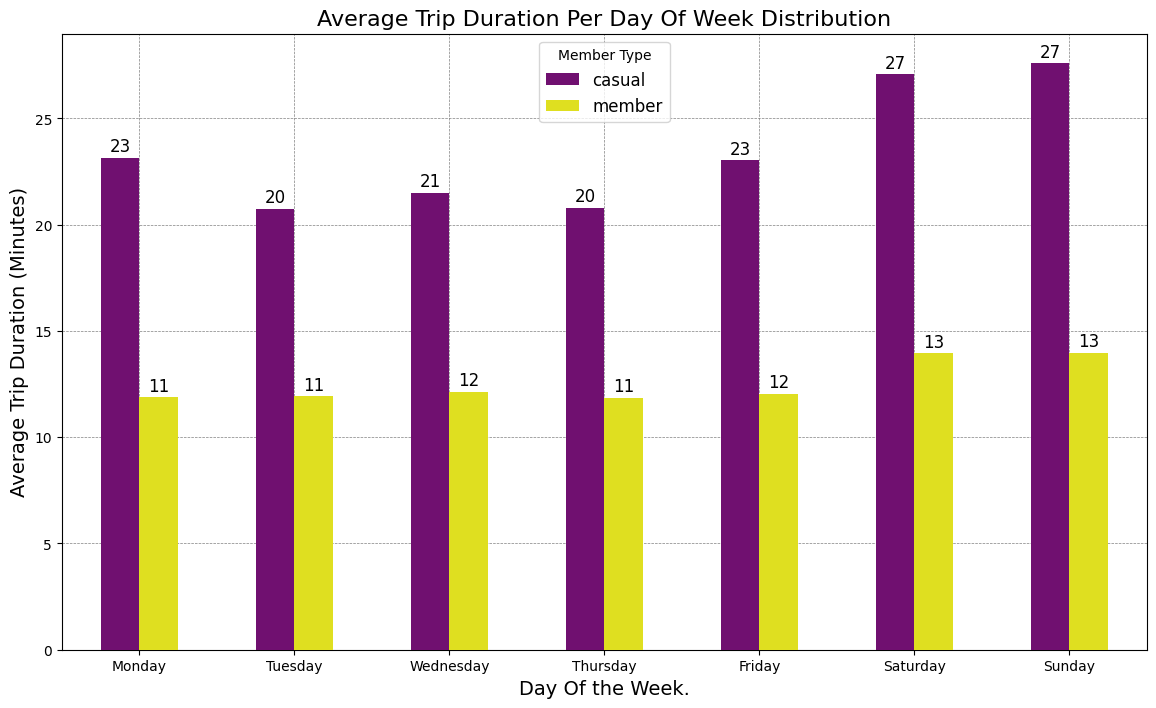

In [32]:
plt.figure(figsize=(14, 8))
custom_palette = ["#800080", "#FFFF00"]
sns.barplot(data=img4_grouped, x="Week_day", y="trip_duration", hue="member_casual", palette=custom_palette, width=0.5, zorder=3)
for p in plt.gca().patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    plt.text(x_position, height + 0.1, f'{int(height)}', ha='center', va='bottom', fontsize=12)
plt.grid(True, which='both', axis='y',linestyle='dashed', linewidth=0.5, color='gray', zorder=3)
plt.grid(True, which='both', axis='x',linestyle='dashed', linewidth=0.5, color='gray', zorder=3)
plt.title("Average Trip Duration Per Day Of Week Distribution", fontsize=16)
plt.xlabel("Day Of the Week.", fontsize=14)
plt.ylabel("Average Trip Duration (Minutes)", fontsize=14)
plt.legend(title='Member Type', loc='upper center', fontsize=12)
plt.show()

* It is noteworthy that longer trips are the responsibility of casual riders throughout the week. On weekends, the length of the trip increases.

# PLOT 7 

* A bar plot of the total rides divided by each weekday will be displayed below.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


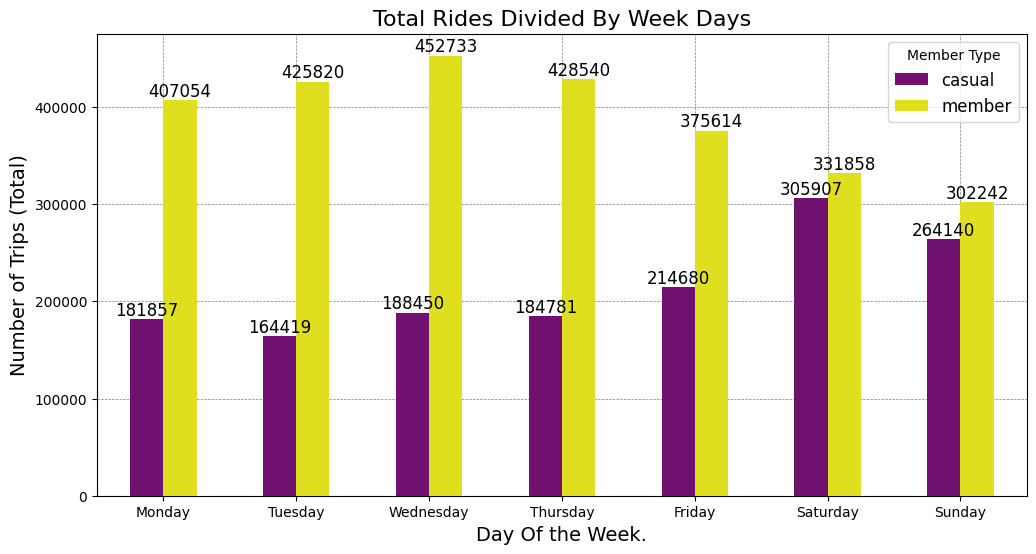

In [33]:
plt.figure(figsize=(12, 6))
custom_palette = ["#800080", "#FFFF00"]
sns.barplot(data=img5_grouped, x="Week_day", y="ride_id", hue="member_casual", palette=custom_palette, width=0.5, zorder=3)
for p in plt.gca().patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    plt.text(x_position, height + 0.1, f'{int(height)}', ha='center', va='bottom', fontsize=12)
plt.grid(True, which='both', axis='y',linestyle='dashed', linewidth=0.5, color='gray', zorder=3)
plt.grid(True, which='both', axis='x',linestyle='dashed', linewidth=0.5, color='gray', zorder=3)
plt.title("Total Rides Divided By Week Days", fontsize=16)
plt.xlabel("Day Of the Week.", fontsize=14)
plt.ylabel("Number of Trips (Total)", fontsize=14)
plt.legend(title='Member Type', loc='upper right', fontsize=12)
plt.show()

* It is evident from the plot above that members are in charge of the majority of the rides, particularly on workdays like Wednesdays. While the number of casual rides tends to rise on weekends, the number of member rides tends to decline as the weekend draws closer.

# PLOT 8 

* The line plot below will display the average number of trips during the last 12 months, divided by the number of days in the month (01–31).

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

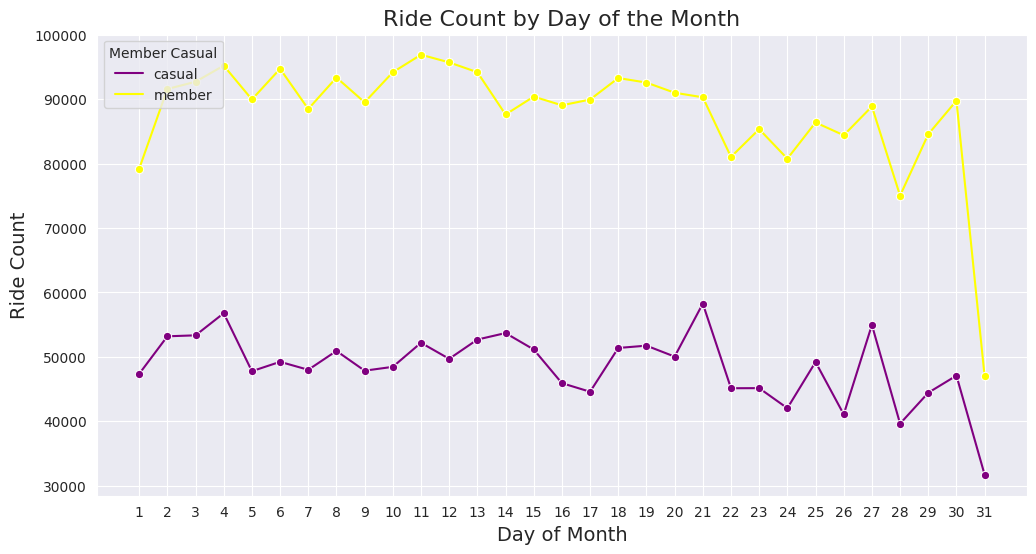

In [34]:
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
custom_palette = {'member': 'yellow', 'casual': 'purple'}
sns.lineplot(data=img6_grouped, x="day_of_month", y="ride_id", hue="member_casual", 
             errorbar=None, marker='o', palette=custom_palette)
plt.xticks(ticks=range(1, 32))
plt.title("Ride Count by Day of the Month", fontsize=16)
plt.xlabel("Day of Month", fontsize=14)
plt.ylabel("Ride Count", fontsize=14)
plt.legend(title="Member Casual", loc="upper left")
plt.show()

* As previously noted, members are in charge of the majority of the rides during the month's thirty-one days.

# PLOT 9 

* Once more, a line chart will be used to show how the average trip durations have changed over the course of the month. (from 01 to 31)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

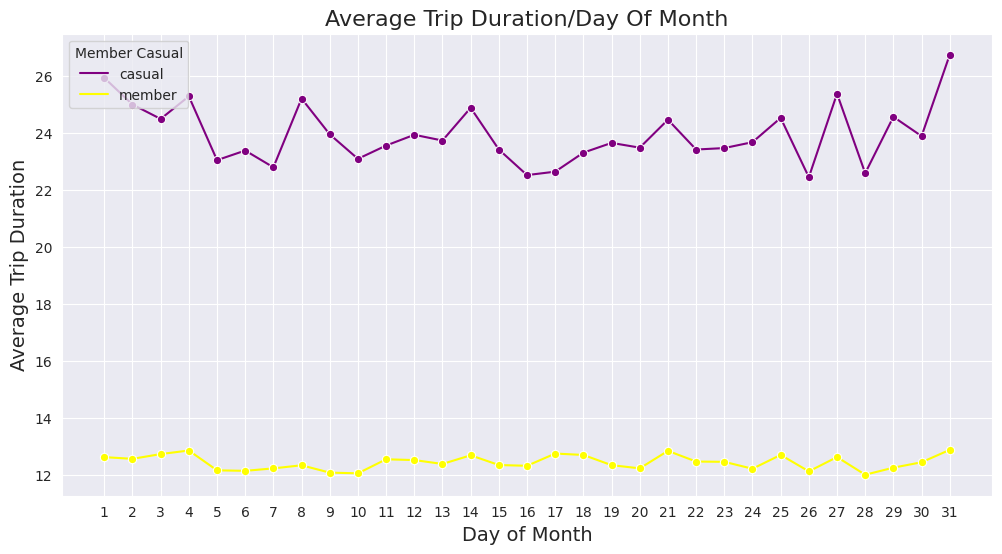

In [35]:
img7_grouped = dfm.groupby(['member_casual','day_of_month']).agg({'trip_duration': 'mean'}).reset_index()
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
custom_palette = {'member': 'yellow', 'casual': 'purple'}
sns.lineplot(data=img7_grouped, x="day_of_month", y="trip_duration", hue="member_casual", 
             errorbar=None, marker='o', palette=custom_palette)
plt.xticks(ticks=range(1, 32))
plt.title("Average Trip Duration/Day Of Month", fontsize=16)
plt.xlabel("Day of Month", fontsize=14)
plt.ylabel("Average Trip Duration", fontsize=14)
plt.legend(title="Member Casual", loc="upper left")
plt.show()

* It is noteworthy that throughout the days of the month (01 to 31), casual members are keeping the bikes for longer periods.

## PLOT 10 

* The changes in total rides over a 12-month period (2023/10 to 2024/10) will be shown below using a line plot with two lines referring to Casual and Members.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

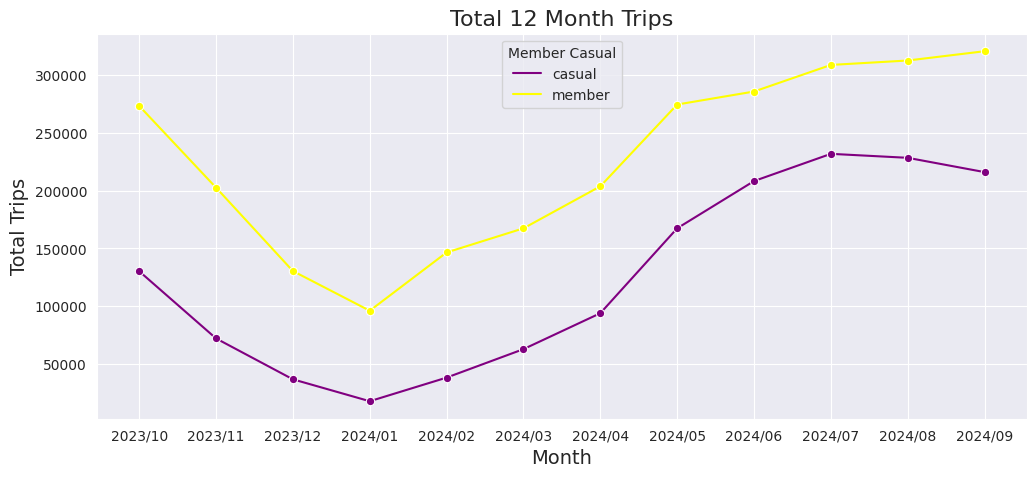

In [36]:
img10_grouped = dfm.groupby(['member_casual','month']).agg({'ride_id': 'count'}).reset_index()
plt.figure(figsize=(12, 5))
sns.set_style("darkgrid")
custom_palette = {'member': 'yellow', 'casual': 'purple'}
sns.lineplot(data=img10_grouped, x="month", y="ride_id", hue="member_casual", 
             errorbar=None, marker='o', palette=custom_palette)
plt.title("Total 12 Month Trips", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Trips", fontsize=14)
plt.legend(title="Member Casual", loc="upper center")
plt.show()

* The two lines move pretty similarly, and it seems that the number of rides done during the year is following a fairly similar pattern for both members and casuals.

* January is the month with the fewest rides for both member types; after January, the number of rides tends to rise, reaching its highest point ever in September for members; in contrast, casuals reach their highest point ever in July.

# PLOT 11 

* To show the changes in total rides over a 12-month period (2023/10 to 2024/10), a two-line chart referring to Casual and Members will be used to display the average trip time.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

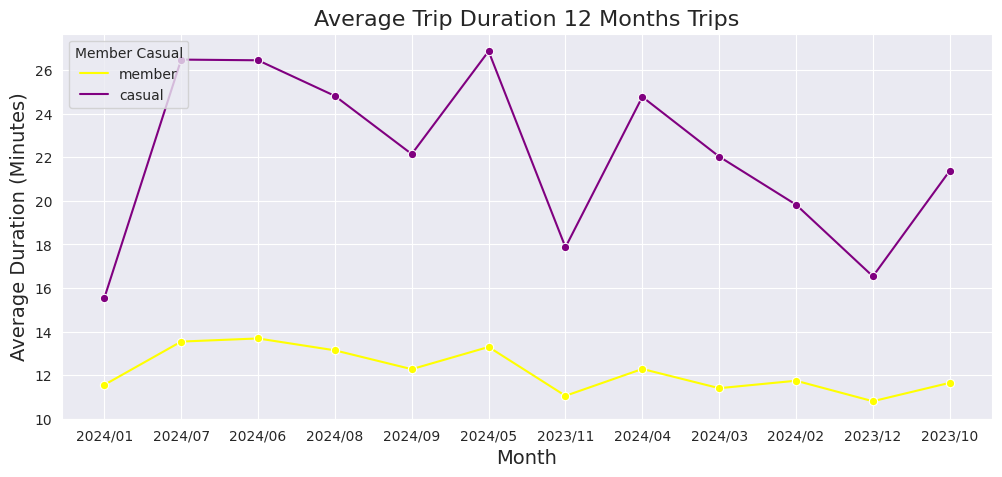

In [37]:
plt.figure(figsize=(12, 5))
sns.set_style("darkgrid")
custom_palette = {'member': 'yellow', 'casual': 'purple'}
sns.lineplot(data=dfm, x="month", y="trip_duration", hue="member_casual", 
             errorbar=None, marker='o', palette=custom_palette)
plt.title("Average Trip Duration 12 Months Trips", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Duration (Minutes)", fontsize=14)
plt.legend(title="Member Casual", loc="upper left")
plt.show()

* Members' average travel time is shorter and more constant. Casuals tend to act differently throughout the year in terms of the length of their trips. For casuals, January is the month with the lowest journey durations; average trip times may be as little as 15 minutes. However, they tend to rise after January, reaching a peak of about 27 minutes trips average for casual members in May.

# Act 

* The analysis's findings indicate that members and casual riders behave differently when going on bike journeys, and we were able to spot some patterns regarding the length and quantity of trips as well as how they vary over the year.

### Guiding questions 

● What is your final conclusion based on your analysis?

The cycling service is typically used differently by members and casual users.
    
● How could your team and business apply your insights?

In order to better understand the behaviors of the two member groups, they would apply the analysis's conclusions to marketing campaigns and promotions for memberships.

● What next steps would you or your stakeholders take based on your findings?

generating advertisements and promotions to attract a particular user base that may eventually become members

● Is there additional data you could use to expand on your findings?

To monitor trends in this particular instance, more personal data about the user, such as age, gender, and city of residence, would be helpful.

### Deliverable 
This analysis was based on three questions:

1. How do annual members and casual riders use Cyclistic bikes diferently?

Members typically take shorter excursions and use the Cyclistic bikes more frequently, accounting for 64.4% of all rides. Casual riders, on the other hand, do longer journeys but are responsible for a smaller percentage of all rides, accounting for 35.6%.

2. Why would casual riders buy Cyclistic annual memberships?

A casual rider would have a membership that allows them to do shorter, more frequent excursions.


3. How can Cyclistic use digital media to influence casual riders to become members?

The stations with the greatest number of casual members (Streeter Dr. & Grand Ave., DuSable Lake Shore Dr. & Monroe St., Michigan Ave. & Oak St.) should be used for their propaganda. They should also look for ways to attract people who use bikes for longer trips like discount on the membership if you have used the bike for a long duration and increase their marketing during the months of May through September, when the number of casual trips is at its highest.

### As we approach the last phase of the Google Data Analytics program, I would want to express my gratitude to everyone who has taken the time to edit my work! 
### I recently applied my understanding of R programming, which I gained from the course, to Python because the concepts are fairly similar, and it worked for me. 


